# Support Vector Machine
<img src='svm1.png' height=400 width=400>
<img src='svm2.png' height=400 width=400>
<img src='svm3.png' height=400 width=400>
<img src='svm4.png' height=400 width=400>
<img src='svm5.png' height=400 width=400>

### Gamma
<img src='svm6.png' height=400 width=400>


### Regularization(C)
<img src='svm7.png' height=400 width=400>

### Kernel
<img src='svm9.png' height=400 width=400>
<img src='svm10.png' height=400 width=400>

## SVM implementation with iris dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
 dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)    # Making dataset from iris dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target # appending target to dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==1].head()  # that mean versicolor starts with 50th index

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df.target==2].head() #that mean virginica starts with 100th index

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x]) # Form one olumn generating another column using pandas apply
df.head()                         # lambda x transformation: for each value of arget,replce target value with target names of x 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df[45:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [12]:
df0 = df[:50] # dataframe of setosa
df1 = df[50:100] # dataframe of versicolor
df2 = df[100:] # dataframe of virginica

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

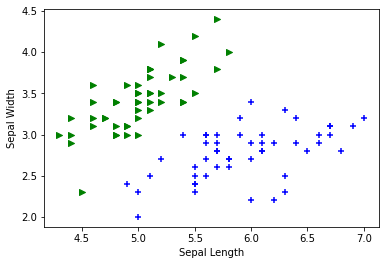

In [14]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='>') # Setosa
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='+')  #Versicolor

**Petal length vs Petal Width (Setosa vs Versicolor)**

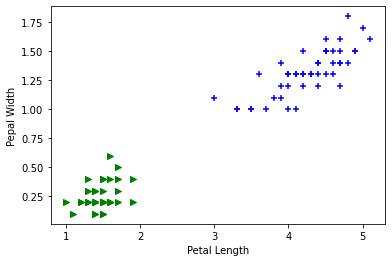

In [15]:
plt.xlabel('Petal Length')
plt.ylabel('Pepal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='>') # Setosa
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='+')  #Versicolor

### Train Using Support Vector Machine (SVM)

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns') # dropping target and flowers name
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # splitting

In [17]:
len(X_train)

120

In [18]:
len(X_test)

30

In [19]:
from sklearn.svm import SVC
model = SVC()                  # building model

model.fit(X_train, y_train)    # training model   

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Here, C=1 mean regularizaion 1, gamma= scale mean gamma scale types, and kernel is rbf types

In [20]:
model.score(X_test, y_test)     # Accuracy 96.67%

0.9666666666666667

In [21]:
model.predict([[4.8,3.0,1.5,0.3]])


array([0])

## Tune parameters

1. **Regularization (C)**

In [22]:
model_C = SVC(C=1)     # giving parameter to change default parameter
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [23]:
model_C = SVC(C=10)     # giving parameter to change default parameter
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)  # opps! Getting 100% accuracy by tuning regularization

1.0

2. **Gamma**

In [24]:
model_g = SVC(gamma=10)    # Chnaging default gamma 
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

3. **Kernel**

In [25]:
model_linear_kernal = SVC(kernel='linear') # changing kernel rbf to linear
model_linear_kernal.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
model_linear_kernal.score(X_test, y_test) # And wow! It's giving 100% accuracy

1.0

## Exercise

*Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then*

1. Measure accuracy of model using different kernels such as rbf and linear.
2. Tune model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size